## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

## Disable Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

## Loading the Data

In [3]:
data = pd.read_csv("births.csv")

In [4]:
data

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [6]:
data.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [7]:
data.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         year  month    day  gender  births
0      False  False  False   False   False
1      False  False  False   False   False
2      False  False  False   False   False
3      False  False  False   False   False
4      False  False  False   False   False
...      ...    ...    ...     ...     ...
15542  False  False   True   False   False
15543  False  False   True   False   False
15544  False  False   True   False   False
15545  False  False   True   False   False
15546  False  False   True   False   False

[15547 rows x 5 columns]>

In [8]:
data.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [9]:
data['day'].fillna(0, inplace = True)
data['day'] = data['day'].astype(int)

In [10]:
data['decade'] = 10 * (data['year'] // 10)
data.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum')
data.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


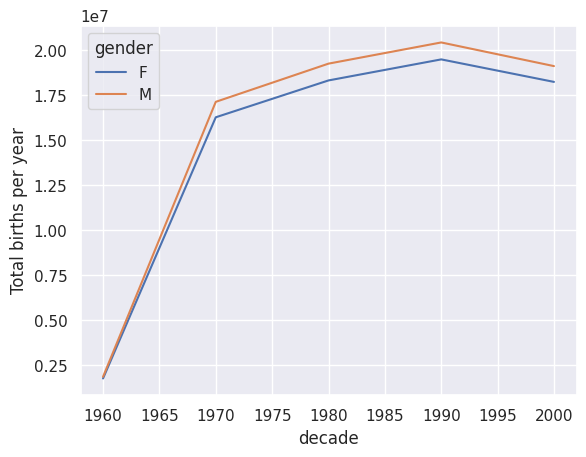

In [11]:
sns.set()
birth_decade = data.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum')
birth_decade.plot() 
plt.ylabel("Total births per year") 
plt.show()

In [12]:
quartiles = np.percentile(data['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
print(f"quartiles[0]: {quartiles[0]}")
print(f"quartiles[1]: {quartiles[1]}")
print(f"quartiles[2]:{quartiles[2]}")

quartiles[0]: 4358.0
quartiles[1]: 4814.0
quartiles[2]:5289.5


In [13]:
data = data.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
data['day'] = data['day'].astype(int)
data.index = pd.to_datetime(10000 * data.year +
                              100 * data.month +
                              data.day, format='%Y%m%d')

data['dayofweek'] = data.index.dayofweek

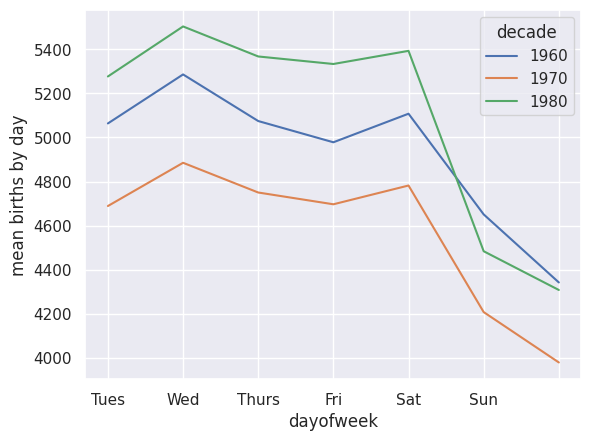

In [14]:
data.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

In [15]:
births_month = data.pivot_table('births', [data.index.month, data.index.day])
print(births_month.head())

births_month.index = [datetime(2012, month, day)
                      for (month, day) in births_month.index]
print(births_month)

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625
...              ...
2012-12-27  4850.150
2012-12-28  5044.200
2012-12-29  5120.150
2012-12-30  5172.350
2012-12-31  4859.200

[366 rows x 1 columns]


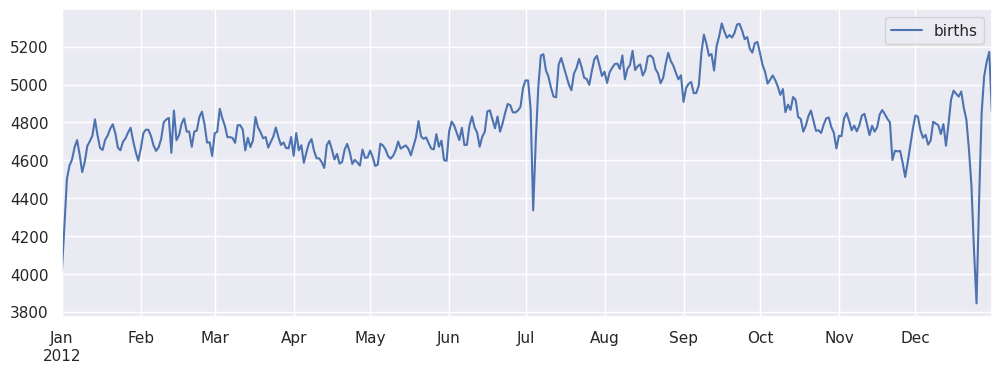

In [16]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()